# Introduction

What you can see here is a single problem from our tutorial that we did not manage to complete in class. Your task is to work through this problem and fill all the gaps that left. Also, you need to reflect on the results at the end of the notebook (you will see a particular space below). I slightly rewrite some problems to achieve more clarity. Should you have any questions, do not hesitate to contact me.

---
---
---
# Snowball Earth

In this problem, we investigate the properties of a simple unidimensional energy balance model. Sun heats the Earth, and the portion of the energy is reflected due to nonzero albedo $\alpha$. The tricky point is that the albedo itself is a function of temperature (soon, you will see the explicit dependence). Being in thermodynamic equilibrium, Earth radiates according to the Stefan-Boltzmann law.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}

The temperature $T$ that you see above is an average value over the globe and altitude. $C$ just fixes a timescale.

Albedo of the planet is the function of average temperature

\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}


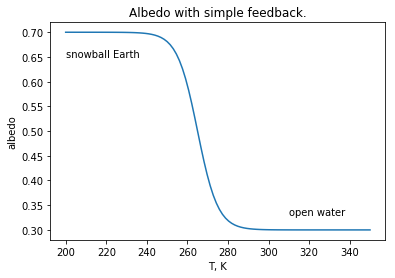

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

T = np.linspace(200, 350, 100)
alpha = 0.5 - 0.2*np.tanh((T - 265)/10)
plt.plot(T, alpha)
plt.xlabel('T, K')
plt.ylabel('albedo')
plt.text(200, 0.65, 'snowball Earth')
plt.text(310, 0.33, 'open water')
plt.title('Albedo with simple feedback.');

This dependence represents a feedback mechanism: once the temperature falls below zero, the snow and ice reflect more radiation than the open water when everything melts due to the rise of temperature.

Our goasl in this problem are

+ to investigate the dynamics and equilibrium state as well as their dependence on the input parameters
+ to consider the forcing scenario, when the Sun activity changes with time

However, first, we need to discuss some additional syntax.

---

## Python: dictionaries, more advanced functions (unknown number of arguments, keyword arguments, lambda), scipy

There are more build-in types, as you probably suspect. The one that we consider now is a dictionary.

In [2]:
# dictionary has keys and values

apple_pie = {
    'brown sugar': '1/2 cup',
    'flour': {'tablespoon': 3},
    'cinnamon': {'teaspoon': 1},
    'ginger': {'teaspoon': 1/4},
    375: 'bake at for 25 minutes',
    (6, 7): 'cups thinly sliced peeled tart apples'
}

print(apple_pie.keys()) # this is how you can see keys
print(apple_pie.values()) # and this gives you values

dict_keys(['brown sugar', 'flour', 'cinnamon', 'ginger', 375, (6, 7)])
dict_values(['1/2 cup', {'tablespoon': 3}, {'teaspoon': 1}, {'teaspoon': 0.25}, 'bake at for 25 minutes', 'cups thinly sliced peeled tart apples'])


In [3]:
# if you want to add another key and a value

apple_pie['Beat egg white'] = 'until foamy'

print(apple_pie.keys())

dict_keys(['brown sugar', 'flour', 'cinnamon', 'ginger', 375, (6, 7), 'Beat egg white'])


In [4]:
# you can iterate over keys

for key in apple_pie.keys():
  print(key, ':', apple_pie[key])

brown sugar : 1/2 cup
flour : {'tablespoon': 3}
cinnamon : {'teaspoon': 1}
ginger : {'teaspoon': 0.25}
375 : bake at for 25 minutes
(6, 7) : cups thinly sliced peeled tart apples
Beat egg white : until foamy


In [5]:
# there are other methods for dictionaries

item = apple_pie.popitem()
print(item)

for key in apple_pie.keys():
  print(key, ':', apple_pie[key])

# but we are not willing to cover them here
# we will use dictionaries to organize our code better as you will see soon

('Beat egg white', 'until foamy')
brown sugar : 1/2 cup
flour : {'tablespoon': 3}
cinnamon : {'teaspoon': 1}
ginger : {'teaspoon': 0.25}
375 : bake at for 25 minutes
(6, 7) : cups thinly sliced peeled tart apples


We know how to define a function, but what if the number of arguments is unavailable in advanced?

In [6]:
# that will do the job

def multiply(*args):
  output = 1
  for argument in args:
    output *= argument
  return output


print(multiply(1, 2, 3), '\n')

print(multiply(1, 2, 3, 4, 5), '\n')

print(multiply(5), '\n')

6 

120 

5 



The same trick works for keword arguments.

In [7]:
# the main difference is that now we are working with dictionaries

def copycat(*args, **kwargs):
  if len(args) != 0:
    print('Here are values of my arguments')
    for argument in args:
      print(argument)
  if len(kwargs) != 0:
    print('Here you see keword argument')
    for key in kwargs.keys():
      print(key, kwargs[key])

copycat(a=4, b=12, c=32, cat='bark', dog='meow')

print('\n')

copycat(12, 13, 14, [1, 2, 3], 'boom', z22 = 13, pr44 = copycat)

Here you see keword argument
a 4
b 12
c 32
cat bark
dog meow


Here are values of my arguments
12
13
14
[1, 2, 3]
boom
Here you see keword argument
z22 13
pr44 <function copycat at 0x7ff634e0be18>


In [8]:
# you can pass arguments the same way you used them in the definition of the function

copycat(*[4, 12, 32], **{'cat': 'bark', 'dog': 'meow'})

Here are values of my arguments
4
12
32
Here you see keword argument
cat bark
dog meow


Lambda!

In [9]:
# suppose you are so smart that you can write a function in a single line
# the usual def statement looks too clumsy, lambda is more concise

g = lambda a, b: a+b

print(g(2, 3))
print(g(12, 15))

G = lambda **args: [print(k, args[k]) for k in args.keys()][0]

G(copy=14, cat=13)

print('\n')

G(**{'cat': 'bark', 'dog': 'meow'})

5
27
copy 14
cat 13


cat bark
dog meow


In [10]:
# another application is to produce a new function from a previously defined

def greetings(Name, form):
  if form is 'polite':
    print(f'It is a pleasure to have you with us, dear {Name}.\n')
  elif form is 'rude':
    print("Hey, who's let this asshole in?\n")
  else:
    print(f'Hi, {Name}.\n')

greetings('Mike', 'polite')
greetings('Mike', 'rude')
greetings('Mike', 'whatever')

# now we define a new function that is always polite

polite_greetings = lambda N, f='polite': greetings(N, f)

polite_greetings('Mike')
polite_greetings('Zebra')

It is a pleasure to have you with us, dear Mike.

Hey, who's let this asshole in?

Hi, Mike.

It is a pleasure to have you with us, dear Mike.

It is a pleasure to have you with us, dear Zebra.



[Scipy](https://docs.scipy.org/doc/scipy-1.3.0/reference/) is another extensive library with a lot of useful functionality. We are going to use their implementation of Newton's method.

In [0]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x0 = np.linspace(0, 10, 20)

f = lambda x, a=0.5: a*x - np.cos(2*x)
df = lambda x, a=0.5: a + 2*np.sin(2*x)
d2f = lambda x, a=0.5: 4*np.cos(2*x)

# getting help
newton?

/usr/local/lib/python3.6/dist-packages/scipy/optimize/zeros.py:461: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)


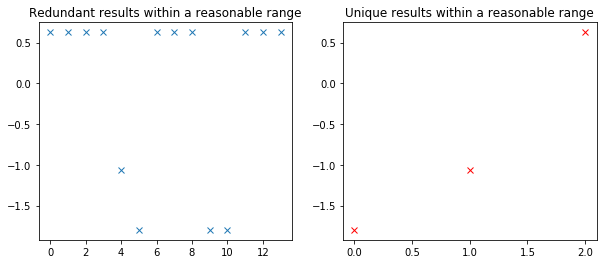

In [12]:
params = {
    'fprime': df,
    'tol': 1e-5,
    'maxiter': 100,
    'fprime2': d2f,
    'rtol': 1e-8
}

result = newton(f, x0, **params)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(result[(result<=2)*(result>=-2)], 'x')
ax[0].set_title('Redundant results within a reasonable range')

ind = np.unique(np.round(result[(result<=2)*(result>=-2)], 4), return_index=True)
ax[1].plot(result[ind[1]], 'x', color='red')
ax[1].set_title('Unique results within a reasonable range');

Another function from Scipy that we are going to use is [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

As an example we solve Van der Pol equation

\begin{equation}
  \begin{split}
    &\dot{x} = y,\\
    &\dot{y} = \mu(1 - x^2)y - x.\\
  \end{split}
\end{equation}

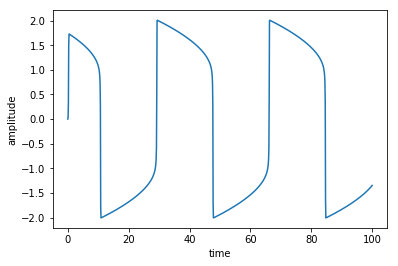

In [13]:
from scipy.integrate import odeint

Van_der_Pol = lambda xy, t, mu: (xy[1], mu*(1 - xy[0]**2)*xy[1] - xy[0])

t = np.linspace(0, 100, 1000)
sol = odeint(Van_der_Pol, [0., 0.1], t, args=(21.43, ))
plt.plot(t, sol[:, 0])
plt.xlabel('time')
plt.ylabel('amplitude');

---

## Subproblem 1

Here are all equations again.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}

The temperature $T$ that you see above is an average value over the globe and altitude. $C$ just fixes a timescale.

Albedo of the planet is the function of average temperature

\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}

For a start lets try to solve this equation from different starting points for the standard set of parameters. 

Take the set of initial temperatures to be $T_0 \in \left[200, 350\right]$ with six uniformly distributed points, and find solution $T(t)$ on the time interval $\left[0, 200\right]$.

**Namely, you need to produce a plot of six solutions to the equation above, starting from just mentioned initial conditions.**

In [0]:
# Define right hand side with optional parameters (Q, epsilon)

### your solution is here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

eps = 0.6
sigma = 5.67*10**-8
Q = 342
T0_range = np.linspace(200, 350, 6)
C = 1
###

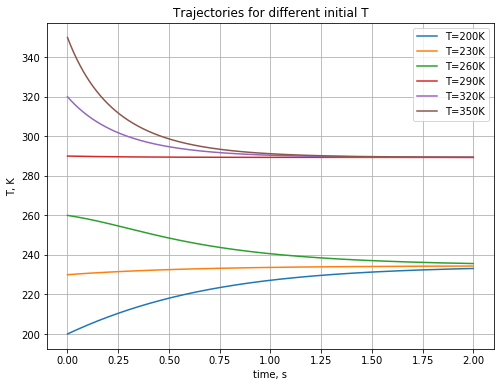

In [15]:
# Solve equation for the starting points specified above and produce a plot with trajectories

### your solution is here
plt.figure(figsize=(8,6))

T_eq = lambda T, t, Qt, epst, sigmat: ((1 - (0.5 - 0.2*np.tanh((T - 265)/10)))*Qt - epst*sigmat*T**4)

time_grid = np.linspace(0, 2, 1000)

solutions = odeint(T_eq, T0_range, time_grid, args=(Q, eps, sigma)).T
for sol, T_j in zip(solutions, T0_range): 
    plt.plot(time_grid, sol, label='T={:.3}K'.format(str(T_j)))
plt.xlabel('time, s')
plt.ylabel('T, K')
plt.legend()
plt.grid(True)
plt.title('Trajectories for different initial T')
plt.show()
###

## Subproblem 2

Here I ask you to produce four plots situated like that.

|||
|:---:|:---:|
|first plot| second plot|
|third plot|fourth plot|

All plots should share axes with other plots, i.e. axis x and y. Each plot should contain six trajectories alike ones in the previous problem. Below you can see the values of parameters for each simulation.

+ first plot: $Q = 342\times 1.5$, $\epsilon = 0.6$, $C = 1$
+ second plot: $Q = 342$, $\epsilon = 0.7$, $C = 1$
+ third plot: $Q = 342$, $\epsilon = 0.6$, $C = 1$
+ fourth plot: $Q = 342$, $\epsilon = 0.3$, $C = 1$

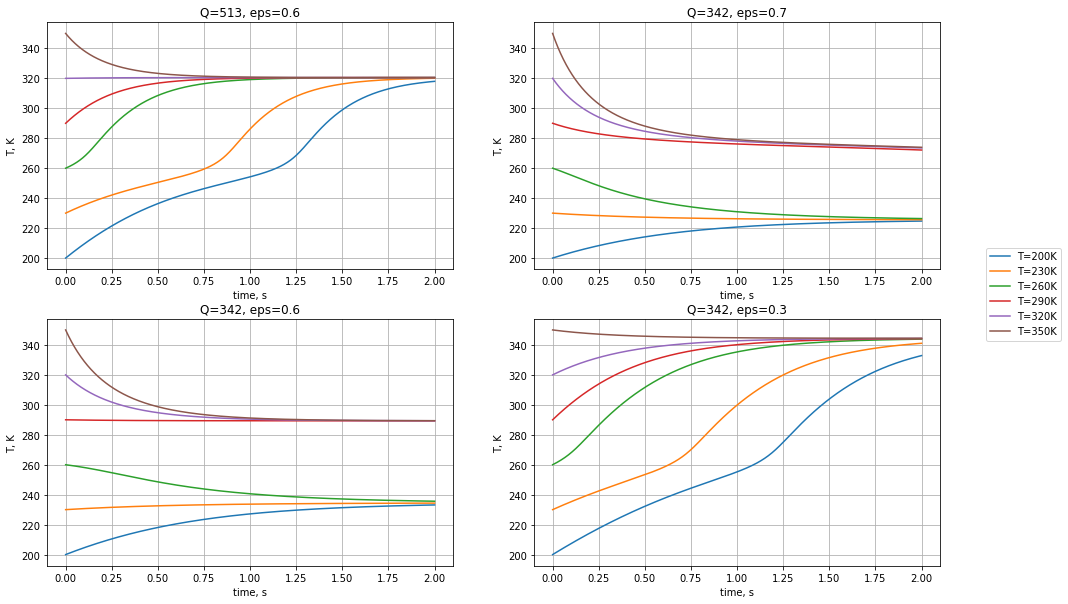

In [16]:
### your solution is here
plt.figure(figsize=(16,10))

Q_range = [1.5*Q, Q, Q, Q]
eps_range = [0.6, 0.7, 0.6, 0.3]

for e, (Q_j, eps_j) in enumerate(zip(Q_range, eps_range)):
  plt.subplot(2, 2, e+1)
  
  solutions = odeint(T_eq, T0_range, time_grid, args=(Q_j, eps_j, sigma)).T
  for sol, T_j in zip(solutions, T0_range): 
      plt.plot(time_grid, sol, label='T={:.3}K'.format(str(T_j)))
  
  plt.grid(True)
  plt.title('Q={:.3}, eps={}'.format(str(Q_j), eps_j))
  plt.xlabel('time, s')
  plt.ylabel('T, K')

plt.legend(loc='center left', bbox_to_anchor=(1.1, 1.1))
###

You can see that the number of steady states depends on the value of parameters. Starting from now, we take $\epsilon = 0.6$ and $C = 1$ to be fixed to the default value and vary $Q$.

## Subproblem 3

Now we are ready to produce the first bifurcation diagram. On the $x$-axis, we put the values of $Q$ from $0.5\times 345$ to $1.5\times 345$. On the $y$-axis, we plot all steady states that can be achieved, starting from different initial conditions. To do that, I propose you to use the same starting temperatures as before, integrate till $t=4$, and put all endpoints on the $y$-axis.

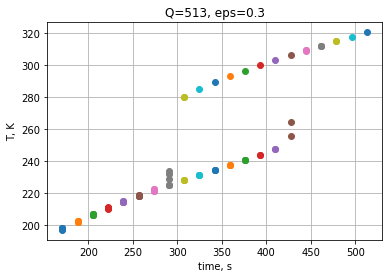

In [17]:
### your solution is here
Q_range = np.linspace(0.5*342, 1.5*342, 21)
eps = 0.6
time_grid = np.linspace(0, 4, 1000)

for Q_j in Q_range:
  solution = odeint(T_eq, T0_range, time_grid, args=(Q_j, eps, sigma))[-1]
  S = np.unique(np.round(solution, 2))
  plt.plot([Q_j]*S.size, S, "o")
  plt.xlabel('time, s')
  plt.ylabel('T, K')
  plt.title('Q={:.3}, eps={}'.format(str(Q_j), eps_j))
  plt.grid(True)
###

The meaning of this graph will be explained later to the full extent. For now, it is enough to notice that there are values of Q correspond to two steady states and also a single equilibrium.

## Snowball Earth: solution part 1

Here are all equations again.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}


\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}

However, the picture that we have is incomplete. That is because we are missing unstable equilibria. To find them, we should compute all roots of the right-hand side for each value of Q. And that is what we are going to do next! More specifically, it would help if you fill the gaps in my code below.

Another comment on what is going on in this subproblem is on the way. In case you have an equation

\begin{equation}
  \frac{du}{dt} = g(u),
\end{equation}

and you are interested in steady-state solutions, you have two options:

+ Integrate this equation until the variable reaches equilibrium (if any). _That is what we have done in the previous exercise._

+ Find all roots of the equation $g(u) = 0$. And that is what I ask you to do now.


In [0]:
from scipy.optimize import newton

Q = np.linspace(0.6*342, 1.4*342, 21)
T0 = np.linspace(200, 350, 10)

### your solution is here

# define the function (rhs), its first and second derivatives
RHS = lambda T, Q: (1 - (0.5 - 0.2*np.tanh((T - 265)/10)))*Q - eps*sigma*T**4
dRHS = lambda T, Q: Q*0.02*(1/np.cosh((T - 265)/10))**2 - 4*eps*sigma*T**3
d2RHS = lambda T, Q: -Q*0.004*(1/np.cosh((T - 265)/10))**2*np.tanh((T - 265)/10) - 12*eps*sigma*T**2
### 

S = []
for q in Q:
  f = lambda T, Q=q: RHS(T, Q) # the function
  df = lambda T, Q=q: dRHS(T, Q) # first derivative
  d2f = lambda T, Q=q: d2RHS(T, Q) # second derivative
  solution = newton(f, T0, fprime=df, fprime2=d2f, maxiter=100)
  s = np.unique(np.round(solution, 2))
  s = s[s>0]
  S.append(s)

Text(0, 0.5, 'T, K')

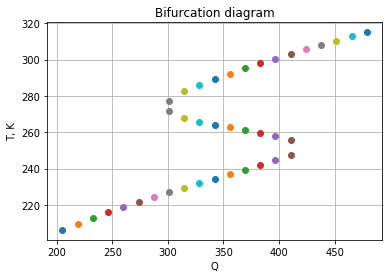

In [19]:
### plot bifurcation diagram
for q, arr in zip(Q, S):
  plt.plot([q]*arr.size, arr, "o")
  
plt.grid(True)
plt.title('Bifurcation diagram')
plt.xlabel('Q')
plt.ylabel('T, K')
###

## Snowball Earth: solution part 2 (forcing)

Suppose the energy flux from the Sun starts to change gradually. We model this situation by the time-dependent term
\begin{equation}
  Q(t) = Q_0\left(\left[1 - \frac{\gamma}{2}\right] + \frac{\gamma}{1 + e^{-\beta t}}\right).
\end{equation}

There are two parameters $\beta>0$ and $\gamma\in \mathbb{R}$. For large $t$, $Q(t)$ reaches $\sim Q_0\left(1 + \frac{\gamma}{2}\right)$.

There are two parameters $\beta>0$ and $\gamma\in \mathbb{R}$. For large $t$, $Q(t)$ reaches $\sim Q_0\left(1 + \frac{\gamma}{2}\right)$. The first parameter $\beta$ defines the speed of change.

I ask you to obtain a trajectory for the following set of parameters and initial conditions:

+ $T_0 = 200~\text{K}$
+ $\gamma = 1$
+ $\beta = 1\big/10$
+ $Q_0, \epsilon$ default values
+ $t_0 = 0$, $t_1 = 20$

When you get the trajectory, produce three graphs following this pattern

|||
|:---:|:---:|
|first plot| second plot|
|third plot||

+ First plot: the trajectory itself
+ Second plot: the bifurcation diagram
+ Third plot: forcing $Q(t)$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in cosh
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in cosh
  # This is added back by InteractiveShellApp.init_path()


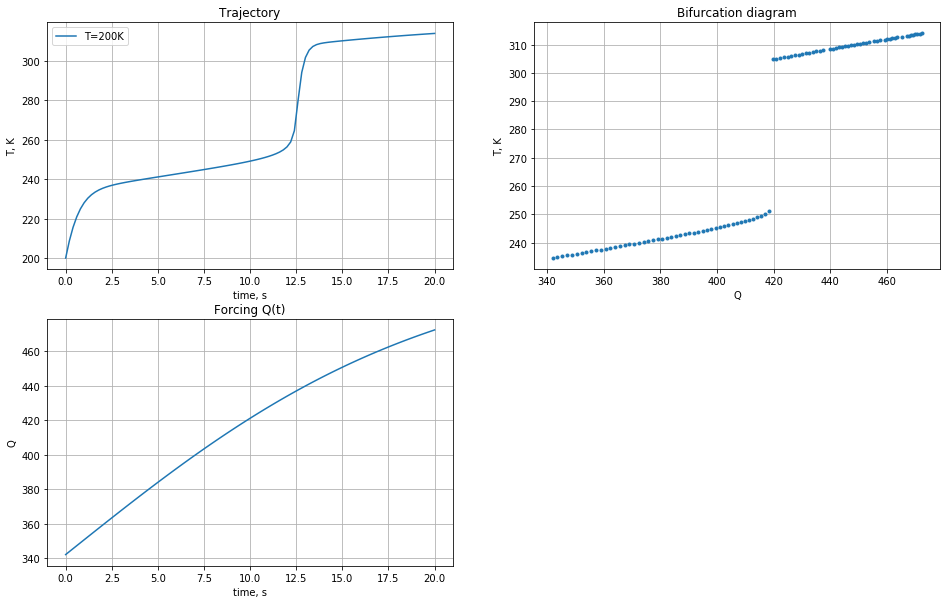

In [20]:
# define new right-hand side
### your solution is here
plt.figure(figsize=(16,10))

T0 = 200
gamma = 1
beta = 0.1
t0 = 0
t1 = 20
Q0 = 342
eps = 0.6
time_grid = np.linspace(t0,t1,101)

Qt = lambda t: Q0*((1-gamma/2) + gamma/(1+np.exp(-beta*t)))
Qt_vals = [Qt(t) for t in time_grid]

# 1st:
T_eq = lambda T, t, epst, sigmat: ((1 - (0.5 - 0.2*np.tanh((T - 265)/10)))*Qt(t) - epst*sigmat*T**4)

plt.subplot(2, 2, 1)
sol = odeint(T_eq, T0, time_grid, args=(eps, sigma))
plt.plot(time_grid, sol[:, 0], label='T={:.3}K'.format(str(T0)))
plt.xlabel('time, s')
plt.ylabel('T, K')
plt.grid(True)
plt.title('Trajectory')
plt.legend()

# 2nd:
S = []
qnz = []
for q in Qt_vals:
  f = lambda T, Q=q: RHS(T, Q) # the function
  df = lambda T, Q=q: dRHS(T, Q) # first derivative
  d2f = lambda T, Q=q: d2RHS(T, Q) # second derivative
  solution = newton(f, T0, fprime=df, fprime2=d2f, maxiter=1000)
  if solution > 0:
    S.append(solution)
    qnz.append(q)

plt.subplot(2, 2, 2)
plt.plot(qnz, S, ".")
  
plt.grid(True)
plt.title('Bifurcation diagram')
plt.xlabel('Q')
plt.ylabel('T, K')


# 3rd
plt.subplot(2, 2, 3)
plt.plot(time_grid, Qt_vals)
plt.xlabel('time, s')
plt.ylabel('Q')
plt.title('Forcing Q(t)')
plt.grid(True)
###

## Snowball Earth: solution part 3 (forcing)

In this problem, I ask you to explain the trajectory from the previous exercise based on what you have learned from the bifurcation diagram.

___
**Provide your explanation here!**

Depending of the different Q and beginning in the different initial values we can come to the different steady states. But for some Q we can come to more than one steady states. Using analitical calculations we can find the unstable states. When we integrate we can't find them but when we solve the equation we find them.

___

Did we have this scenario in our past? [Yep](https://en.wikipedia.org/wiki/Snowball_Earth).